# Extract

In [1]:
import pandas as pd
joined_data=pd.read_csv('joined_dataset.csv')


c:\users\simay\code\bigdata\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (18,30) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
import matplotlib.pyplot as plt

In [3]:
joined_data.rename(columns=lambda x: x.strip() ,inplace=True) #get rid of unnecesary space 

In [4]:
joined_data.columns

Index(['Unnamed: 0', 'DOS ID', 'Current Entity Name',
       'Initial DOS Filing Date', 'County', 'Jurisdiction', 'Entity Type',
       'DOS Process Name', 'DOS Process Address 1', 'DOS Process Address 2',
       'DOS Process City', 'DOS Process State', 'DOS Process Zip', 'CEO Name',
       'CEO Address 1', 'CEO Address 2', 'CEO City', 'CEO State', 'CEO Zip',
       'Registered Agent Name', 'Registered Agent Address 1',
       'Registered Agent Address 2', 'Registered Agent City',
       'Registered Agent State', 'Registered Agent Zip', 'Location Name',
       'Location Address 1', 'Location Address 2', 'Location City',
       'Location State', 'Location Zip', 'month', 'day', 'year', 'Area',
       'Year', 'Month', 'Labor Force', 'Employed', 'Unemployed',
       'Unemployment Rate'],
      dtype='object')

# Distribution of average unemployment rate over time

In [5]:
joined_data.columns

Index(['Unnamed: 0', 'DOS ID', 'Current Entity Name',
       'Initial DOS Filing Date', 'County', 'Jurisdiction', 'Entity Type',
       'DOS Process Name', 'DOS Process Address 1', 'DOS Process Address 2',
       'DOS Process City', 'DOS Process State', 'DOS Process Zip', 'CEO Name',
       'CEO Address 1', 'CEO Address 2', 'CEO City', 'CEO State', 'CEO Zip',
       'Registered Agent Name', 'Registered Agent Address 1',
       'Registered Agent Address 2', 'Registered Agent City',
       'Registered Agent State', 'Registered Agent Zip', 'Location Name',
       'Location Address 1', 'Location Address 2', 'Location City',
       'Location State', 'Location Zip', 'month', 'day', 'year', 'Area',
       'Year', 'Month', 'Labor Force', 'Employed', 'Unemployed',
       'Unemployment Rate'],
      dtype='object')

In [9]:
unemployment_small_data =joined_data.drop(['Unnamed: 0','Area' ,'Current Entity Name', 'Initial DOS Filing Date', 'Jurisdiction', 
         'DOS Process Name','DOS Process Address 1', 'DOS Process Address 2', 
         'DOS Process City','DOS Process State',  'CEO Name', 'CEO Address 1', 
         'CEO Address 2', 'CEO City', 'CEO State','Registered Agent Name', 
         'Registered Agent Address 1','Registered Agent Address 2', 
         'Registered Agent City','Entity Type',
         'Location Zip','DOS Process Zip', 'CEO Zip', 'Registered Agent Zip',
         'Location State',
         'Registered Agent State', 'Location Name', 'day',
         'Location Address 1', 'Location Address 2', 'Location City',
        'Labor Force', 'Employed', 'Unemployed', 'Year', 'Month', 'DOS ID'], axis=1)

In [38]:
unemployment_small_data.head()

,County,month,year,Unemployment Rate
0,kings,5,2005,5.8
1,kings,5,2005,5.8
2,kings,5,2005,5.8
3,kings,5,2005,5.8
4,kings,5,2005,5.8


In [39]:
all_counties = list(set(unemployment_small_data['County']))

In [40]:
year_county_count = unemployment_small_data.groupby(by=['year', 'County'])['Unemployment Rate'].mean()
year_county_count = pd.DataFrame(year_county_count)

In [41]:
year_county_count.to_csv('unemp_year_county_count.csv')

In [42]:
year_month_county_count = unemployment_small_data.groupby(by=['year', 'month','County'])['Unemployment Rate'].mean()
year_month_county_count = pd.DataFrame(year_month_county_count)

In [43]:
year_month_county_count.to_csv('unemp_year_month_county_count.csv')

In [44]:
county_year_month_count = unemployment_small_data.groupby(by=['County','year', 'month'])['Unemployment Rate'].mean()
county_year_month_count = pd.DataFrame(county_year_month_count)

In [45]:
county_year_month_count.to_csv('unemp_county_year_month_count.csv')

Clinton County
Fulton County
Genesee County
Greene County
Hamilton County
New York County
Richmond County
Seneca County
Yates County

`Visualization`

In [46]:
import seaborn as sns
#import matplotlib.pyplot as plt

In [47]:
df=pd.read_csv('unemp_year_county_count.csv')

In [59]:
#fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in indches
df = df[df["year"]>=1990]

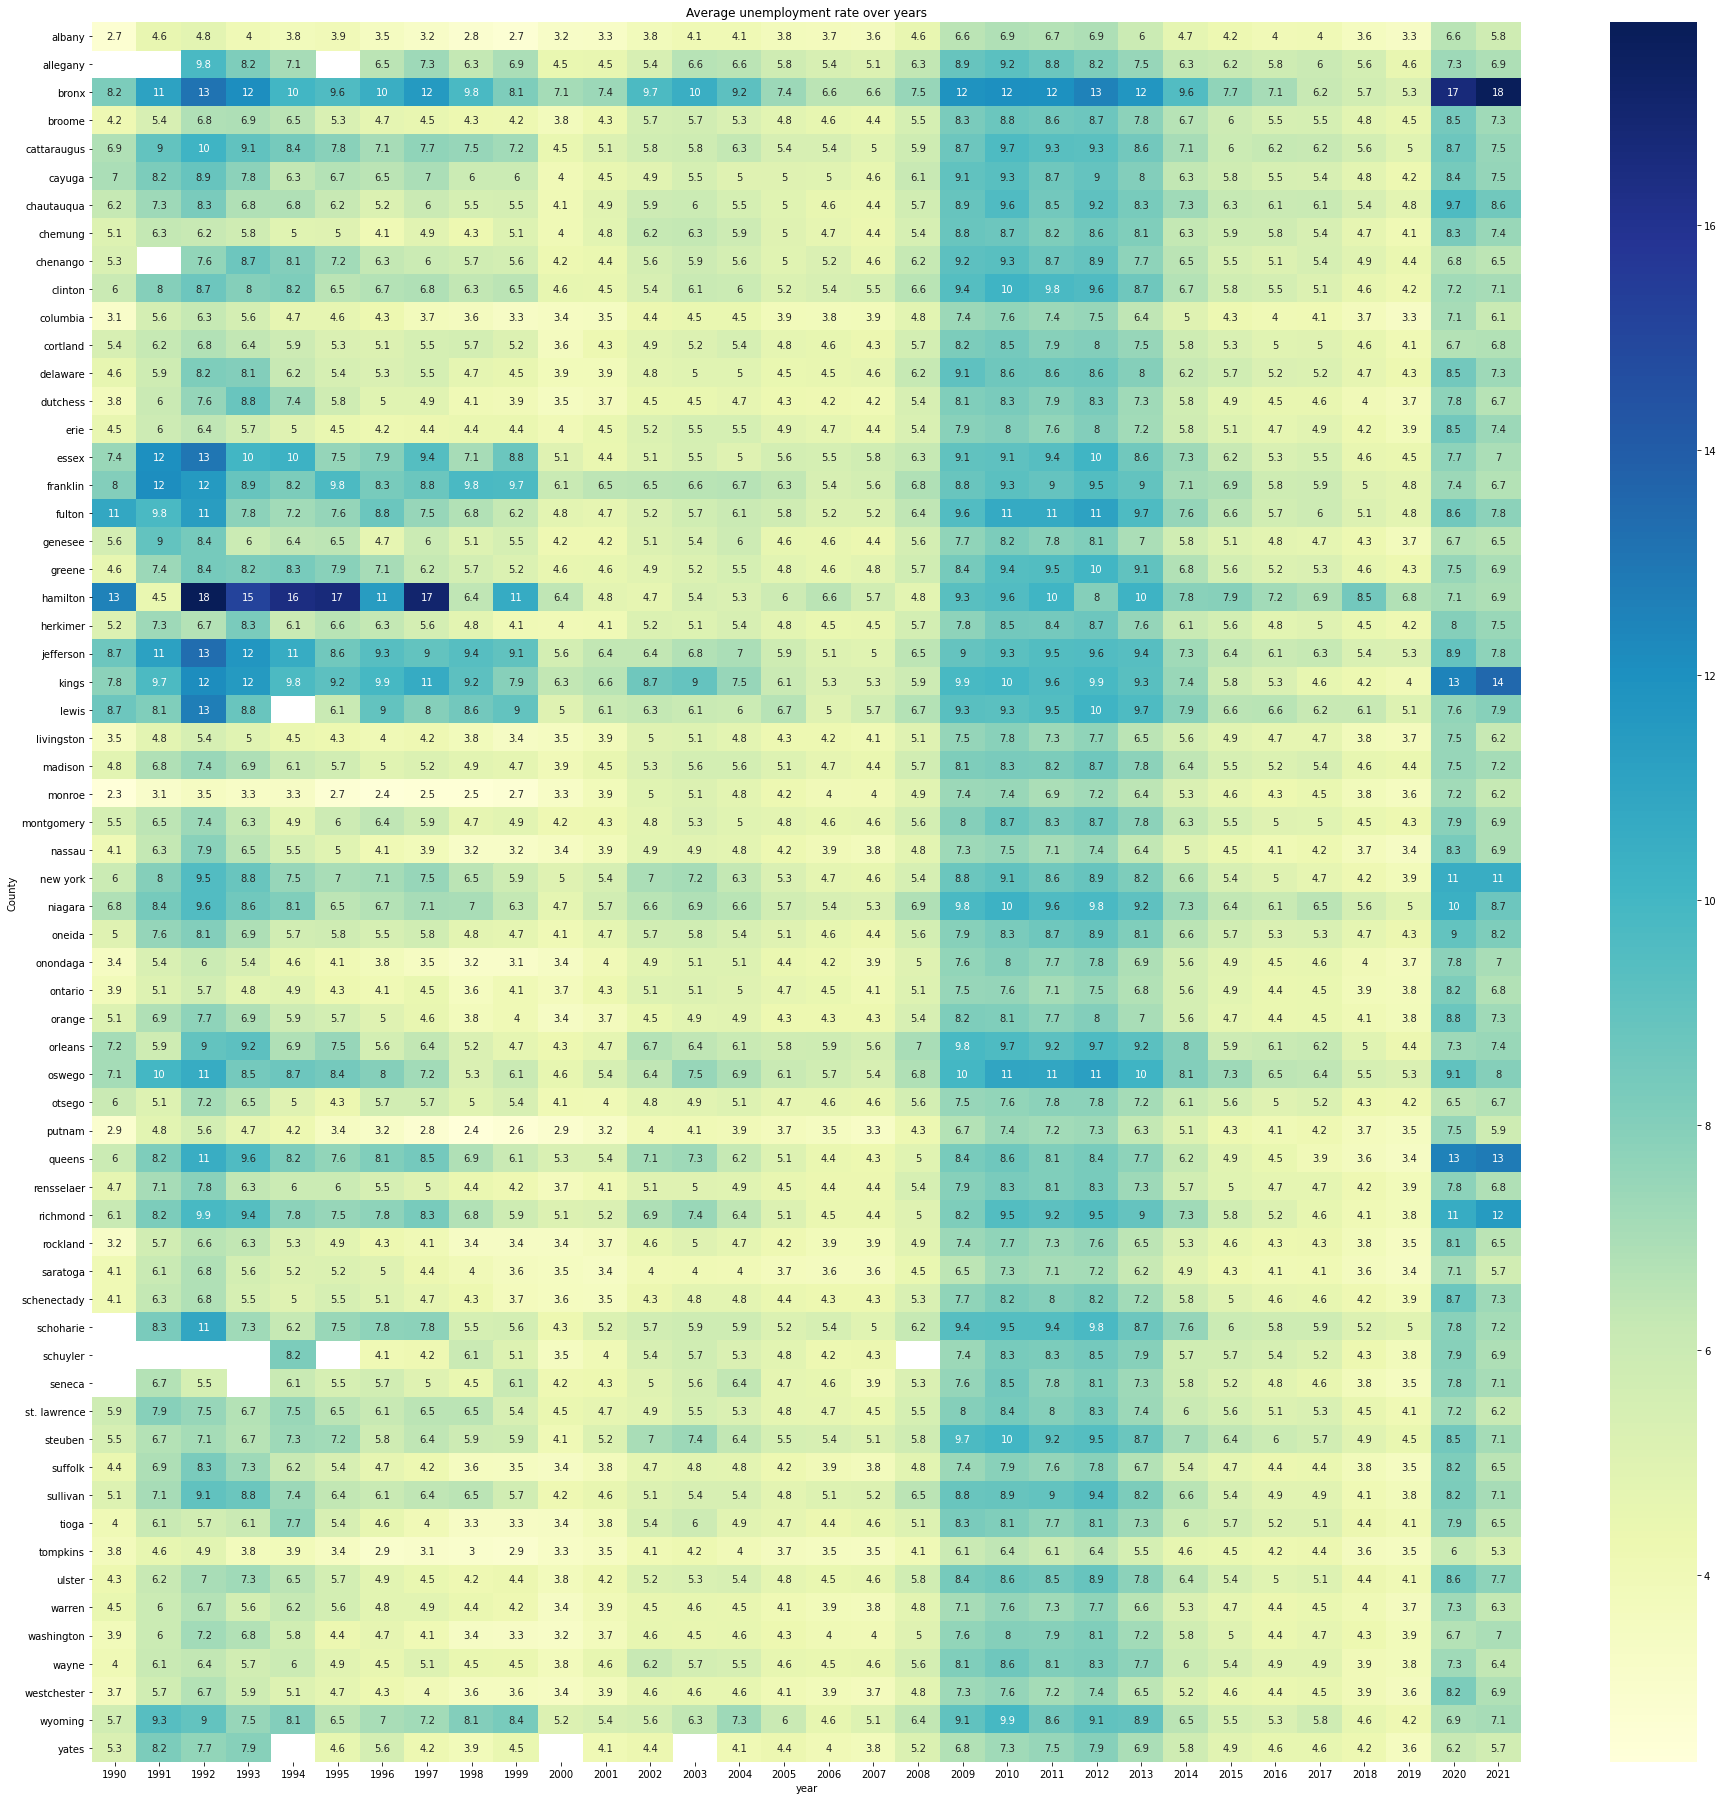

In [60]:
plt.figure(figsize = (32,32))
plt.title("Average unemployment rate over years")
ax = sns.heatmap(df.pivot("County", "year", 'Unemployment Rate'),  cmap="YlGnBu", annot=True)

In [24]:
#jupyter nbextension enable --py widgetsnbextension

In [50]:
#import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [51]:
%matplotlib inline
from ipywidgets import interactive

In [52]:
df1=pd.read_csv('unemp_year_month_county_count.csv')

In [61]:
def plotting(year):
    plt.figure(figsize = (32,32))
    plt.title("Average unemployment Year: "+str(year))
    dataframe = df1[df1["year"]==year]
    ax = sns.heatmap(dataframe.pivot("County", "month", 'Unemployment Rate'),  cmap="YlGnBu", annot=True)
    

In [62]:
interactive_plot = interact(plotting, year=[i for i in range(1990,2022,1)] )

interactive(children=(Dropdown(description='year', options=(1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 19…

In [28]:
df2=pd.read_csv('unemp_county_year_month_count.csv')

In [63]:
def plotting2(county):
    plt.figure(figsize = (32,32))
    plt.title("Average unemployment in "+str(county) + " county")
    dataframe = df1[df1["County"]==county]
    ax = sns.heatmap(dataframe.pivot("year", "month", 'Unemployment Rate'),  cmap="YlGnBu", annot=True)
    

In [64]:
interactive_plot = interact(plotting2, county=all_counties )

interactive(children=(Dropdown(description='county', options=('dutchess', 'rensselaer', 'schoharie', 'onondaga…